In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

In [2]:
class AdamOptimizer:
    def __init__(self,function,gradient_function,args,learning_rate=0.2,beta_1=0.9,beta_2=0.99,epsilon=10**-8,n_iters=10000,bounds=None,init = None):
        self.func = function
        self.grad = gradient_function
        self.args = args
        self.lr = learning_rate
        self.b1 = beta_1
        self.b2 = beta_2
        self.eps = epsilon
        self.n_iters = n_iters
        if bounds is None:
            self.theta = np.array([0 for i in range(len(args))])
        else:
            self.theta = np.array([np.random.uniform(bounds[i,0],bounds[i,1]) for i in range(len(args))])
        if init is not None:
            self.theta = np.array(init)
        self.m = np.array([0 for i in range(len(args))])
        self.v = np.array([0 for i in range(len(args))])
        self.path = [self.theta]
        self.is_optimized = False
    def optimize(self,verbose=False,every_n_iters = 100):
        for t in range(self.n_iters):
            
            if verbose and t%every_n_iters == 0:
                print(f"iteration {t}")
                print({a:b for a,b in zip(self.args,self.theta)})
                
            g = self.grad(*self.theta)
            self.m,self.v = self.__update(self.m,self.v,g)
            m_hat = self.__bias_correction(self.m,self.b1,t+1)
            v_hat = self.__bias_correction(self.v,self.b2,t+1)
            self.theta = self.__update_x(self.theta,m_hat,v_hat)
            self.path.append(self.theta)
            if all(np.abs(self.path[-1]-self.path[-2]) < 10**-8):
                if verbose:
                    print(f"Converged at iteration {t}")
                break
        self.is_optimized = True
            
    def __update(self,m,v,g):
        new_m = np.add(self.b1 * m, (1-self.b1) * g)
        new_v = np.add(self.b2 * v, (1-self.b2) * np.square(g))
        return new_m, new_v
    
    def __bias_correction(self,arr,beta,time):
        return arr/(1-beta**(time+1))
    
    def __update_x(self,x,m_hat,v_hat):
        return x - self.lr * np.divide(m_hat,np.sqrt(v_hat)+self.eps)
    
    def get_optimal_weights(self):
        if self.is_optimized:
            return {a:b for a,b in zip(self.args,self.theta)}
        else:
            print("Not optimized yet")
    def get_path(self,steps):
        k = max(len(self.path)//steps,1)
        ans = [self.path[i] for i in range(len(self.path)) if i%k == 0]
        return ans

In [3]:
def rosenbrok(x,y):
    return (1-x)**2 + 100*(y-x**2)**2

def grad_rosenbrok(x,y):
    return np.array([-2*(1-x)+100*2*(y-x**2)*-2*x, 2*100*(y-x**2)])

def paraboloid(x,y):
    return (x-2)**2 + (y+3)**2

def grad_paraboloid(x,y):
    return np.array([2*(x-2),2*(y+3)])

def myFunc(w1,w2):
    return (w1+2)**2*(w2+1)**2 + (w1+2)**2 + 0.1*(w2+1)**2

def grad(w1,w2):
    return np.array([2*(w1+2)*(1+(w2+1)**2),2*(w2+1)*(0.1+(w1+2)**2)])

AO = AdamOptimizer(rosenbrok,grad_rosenbrok,['x','y'],init = [1.5,-1])
AO.optimize()
path_r = np.array(AO.get_path(5000))
print(AO.get_optimal_weights())

print('\n')

AO = AdamOptimizer(paraboloid,grad_paraboloid,['x','y'],init = [-1,1])
AO.optimize()
path_p = np.array(AO.get_path(100))
print(AO.get_optimal_weights())

print('\n')
    
AO = AdamOptimizer(myFunc,grad,['x','y'],init = [-1,1])
AO.optimize()
path_f = np.array(AO.get_path(100))
print(AO.get_optimal_weights())

{'x': 0.9798898988114061, 'y': 0.947682543774997}


{'x': 1.9999999471364946, 'y': -3.0000000759634977}


{'x': -2.000000078851315, 'y': -0.9999998847245687}


Text(0, 0.5, 'Y')

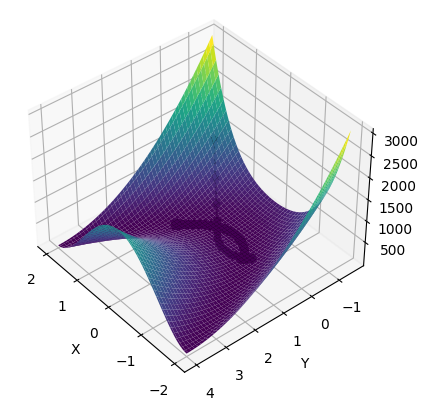

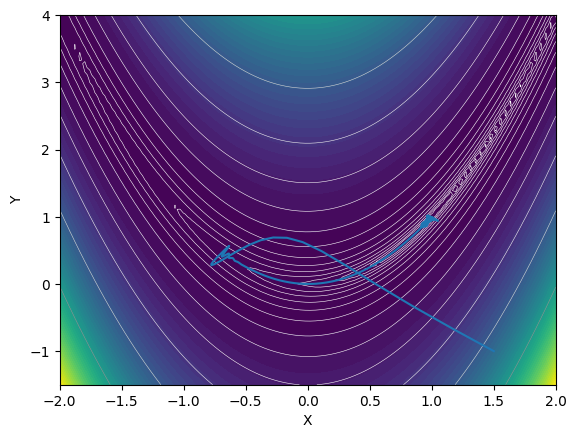

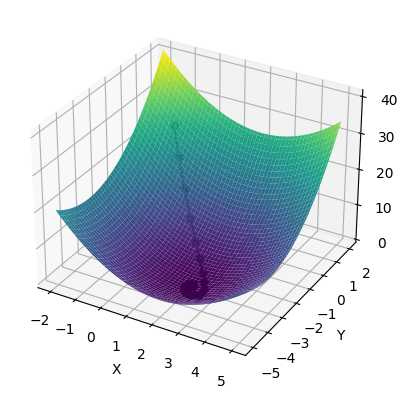

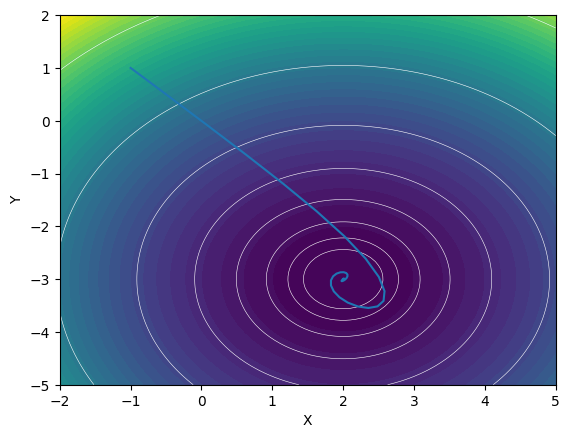

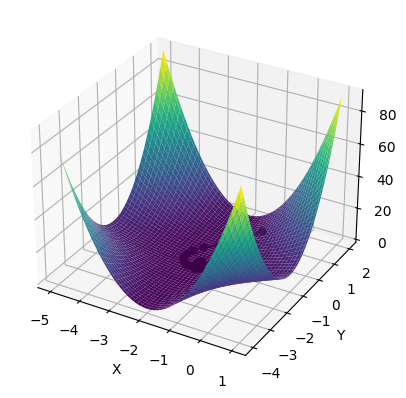

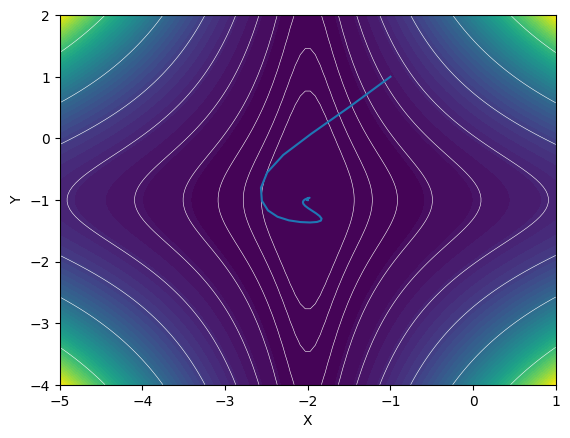

In [4]:
x,y = np.linspace(-2,2,100),np.linspace(-1.5,4,100)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,rosenbrok(X,Y),cmap='viridis')
ax.plot3D(path_r[:,0],path_r[:,1],rosenbrok(path_r[:,0],path_r[:,1]),ms=5,marker='o',color='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.azim = 140
ax.elev = 40


fig=plt.figure()
ax=plt.axes()
ax.contourf(X,Y,rosenbrok(X,Y),50)
ax.contour(X,Y,rosenbrok(X,Y),np.logspace(-0.5,3.5,15,base=10),linewidths=0.4,cmap="Greys")
ax.plot(path_r[:,0],path_r[:,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')

x,y = np.linspace(-2,5,100),np.linspace(-5,2,100)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,paraboloid(X,Y),cmap="viridis")
ax.plot3D(path_p[:,0],path_p[:,1],paraboloid(path_p[:,0],path_p[:,1]),ms=5,marker='o',color='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.azim = -60
ax.elev = 30

fig=plt.figure()
ax=plt.axes()
ax.contourf(X,Y,paraboloid(X,Y),50)
ax.contour(X,Y,paraboloid(X,Y),np.logspace(-0.5,3.5,15,base=10),linewidths=0.4,cmap="Greys")
ax.plot(path_p[:,0],path_p[:,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')

x,y = np.linspace(-5,1,100),np.linspace(-4,2,100)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,myFunc(X,Y),cmap="viridis")
ax.plot3D(path_f[:,0],path_f[:,1],myFunc(path_f[:,0],path_f[:,1]),ms=5,marker='o',color='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.azim = -60
ax.elev = 30

fig=plt.figure()
ax=plt.axes()
ax.contourf(X,Y,myFunc(X,Y),50)
ax.contour(X,Y,myFunc(X,Y),np.logspace(-0.5,3.5,15,base=10),linewidths=0.4,cmap="Greys")
ax.plot(path_f[:,0],path_f[:,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [5]:
optimal_soln = [1,1]

beta_1 = np.array([np.ones(101)*_ for _ in np.linspace(0.01,0.99,99)]).flatten()
epsilon = np.array([np.linspace(10**-8,10**-6,101) for _ in range(99)]).flatten()

colors = []

alpha = 0.001
beta2 = 0.3
## the eigen values of hessian at optima are 501 +- sqrt(250601)
max_eigen_val = 501 + np.sqrt(250601)
for beta1 in np.linspace(0.01,0.99,99):
    for eps in np.linspace(10**-8,10**-6,101):
        AO = AdamOptimizer(rosenbrok,grad_rosenbrok,['x','y'],beta_1=beta1,beta_2=beta2,epsilon=eps,learning_rate=alpha)
        AO.optimize()
        sol = AO.get_optimal_weights()
        ineq_1 = beta1**2 < np.sqrt(beta2)
        ineq_2 = max_eigen_val*alpha*(1-beta1)/np.sqrt(eps) < 2*beta1+2
        ineq_3 = all([abs(sol['x'] - optimal_soln[0])<=0.01,abs(sol['y']-optimal_soln[1])<=0.01])
        if ineq_1 and ineq_2 and ineq_3:
            colors.append('g')
        elif not ineq_1 and ineq_2 and ineq_3:
            colors.append('b')
        elif ineq_1 and not ineq_2 and ineq_3:
            colors.append('y')
        elif not ineq_1 and not ineq_2 and ineq_3:
            colors.append('w')
        elif ineq_1 and ineq_2 and not ineq_3:
            colors.append('k')
        elif not ineq_1 and ineq_2 and not ineq_3:
            colors.append('c')
        elif ineq_1 and not ineq_2 and not ineq_3:
            colors.append('m')
        else:
            colors.append('r')

([<matplotlib.axis.YTick at 0x12c3db850>,
 [Text(0, 1e-08, '1e-08'),
  Text(0, 2.08e-07, '2.08e-07'),
  Text(0, 4.06e-07, '4.06e-07'),
  Text(0, 6.04e-07, '6.04e-07'),
  Text(0, 8.02e-07, '8.02e-07'),
  Text(0, 1e-06, '1e-06')])

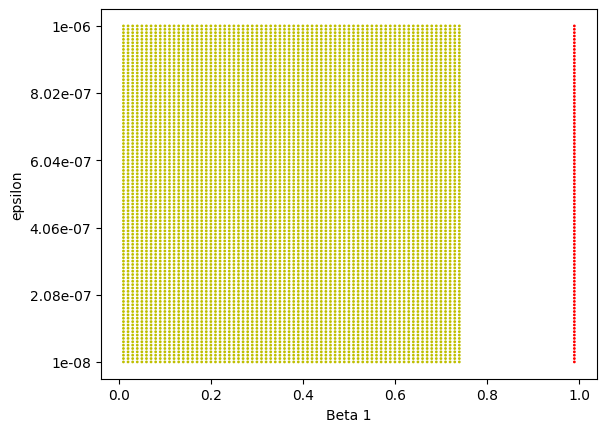

In [6]:
plt.scatter(beta_1,epsilon,color = colors,s=1)
plt.xlabel("Beta 1")
plt.ylabel("epsilon")
plt.yticks(np.linspace(10**-8,10**-6,6),np.linspace(10**-8,10**-6,6))

In [7]:
optimal_soln = [2,-3]

beta_1 = np.array([np.ones(101)*_ for _ in np.linspace(0.01,0.99,99)]).flatten()
epsilon = np.array([np.linspace(10**-8,10**-6,101) for _ in range(99)]).flatten()

colors = []

alpha = 0.001
beta2 = 0.2
## the eigen values of hessian at optima are 2,2
max_eigen_val = 2
for beta1 in np.linspace(0.01,0.99,99):
    for eps in np.linspace(10**-8,10**-6,101):
        AO = AdamOptimizer(paraboloid,grad_paraboloid,['x','y'],beta_1=beta1,beta_2=beta2,epsilon=eps,learning_rate=alpha)
        AO.optimize()
        sol = AO.get_optimal_weights()
        ineq_1 = beta1**2 < np.sqrt(beta2)
        ineq_2 = max_eigen_val*alpha*(1-beta1)/np.sqrt(eps) < 2*beta1+2
        ineq_3 = all([abs(sol['x'] - optimal_soln[0])<=0.01,abs(sol['y']-optimal_soln[1])<=0.01])
        if ineq_1 and ineq_2 and ineq_3:
            colors.append('g')
        elif not ineq_1 and ineq_2 and ineq_3:
            colors.append('b')
        elif ineq_1 and not ineq_2 and ineq_3:
            colors.append('y')
        elif not ineq_1 and not ineq_2 and ineq_3:
            colors.append('w')
        elif ineq_1 and ineq_2 and not ineq_3:
            colors.append('k')
        elif not ineq_1 and ineq_2 and not ineq_3:
            colors.append('c')
        elif ineq_1 and not ineq_2 and not ineq_3:
            colors.append('m')
        else:
            colors.append('r')

([<matplotlib.axis.YTick at 0x12c5db190>,
 [Text(0, 1e-08, '1e-08'),
  Text(0, 2.08e-07, '2.08e-07'),
  Text(0, 4.06e-07, '4.06e-07'),
  Text(0, 6.04e-07, '6.04e-07'),
  Text(0, 8.02e-07, '8.02e-07'),
  Text(0, 1e-06, '1e-06')])

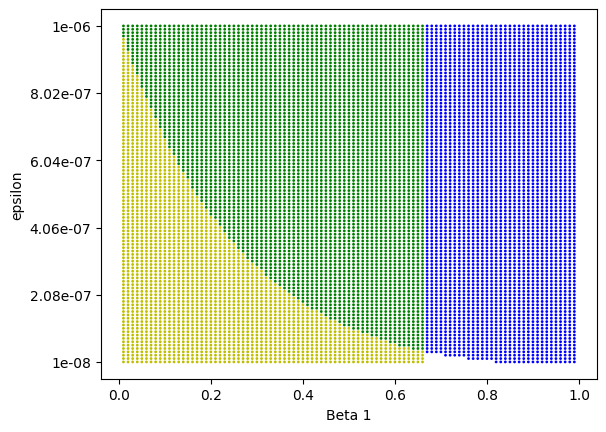

In [8]:
plt.scatter(beta_1,epsilon,color = colors,s=1)
plt.xlabel("Beta 1")
plt.ylabel("epsilon")
plt.yticks(np.linspace(10**-8,10**-6,6),np.linspace(10**-8,10**-6,6))

In [9]:
optimal_soln = [-2,-1]

beta_1 = np.array([np.ones(101)*_ for _ in np.linspace(0.01,0.99,99)]).flatten()
epsilon = np.array([np.linspace(10**-8,10**-6,101) for _ in range(99)]).flatten()

colors = []

alpha = 0.001
beta2 = 0.1
## the eigen values of hessian at optima are 2,1/2
max_eigen_val = 2
for beta1 in np.linspace(0.01,0.99,99):
    for eps in np.linspace(10**-8,10**-6,101):
        AO = AdamOptimizer(myFunc,grad,['w1','w2'],beta_1=beta1,beta_2=beta2,epsilon=eps,learning_rate=alpha)
        AO.optimize()
        sol = AO.get_optimal_weights()
        ineq_1 = beta1**2 < np.sqrt(beta2)
        ineq_2 = max_eigen_val*alpha*(1-beta1)/np.sqrt(eps) < 2*beta1+2
        ineq_3 = all([abs(sol['w1'] - optimal_soln[0])<=0.01,abs(sol['w2']-optimal_soln[1])<=0.01])
        if ineq_1 and ineq_2 and ineq_3:
            colors.append('g')
        elif not ineq_1 and ineq_2 and ineq_3:
            colors.append('b')
        elif ineq_1 and not ineq_2 and ineq_3:
            colors.append('y')
        elif not ineq_1 and not ineq_2 and ineq_3:
            colors.append('w')
        elif ineq_1 and ineq_2 and not ineq_3:
            colors.append('k')
        elif not ineq_1 and ineq_2 and not ineq_3:
            colors.append('c')
        elif ineq_1 and not ineq_2 and not ineq_3:
            colors.append('m')
        else:
            colors.append('r')

([<matplotlib.axis.YTick at 0x12c946150>,
 [Text(0, 1e-08, '1e-08'),
  Text(0, 2.08e-07, '2.08e-07'),
  Text(0, 4.06e-07, '4.06e-07'),
  Text(0, 6.04e-07, '6.04e-07'),
  Text(0, 8.02e-07, '8.02e-07'),
  Text(0, 1e-06, '1e-06')])

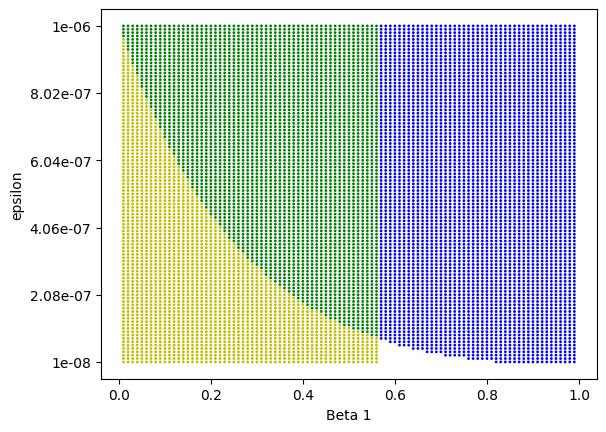

In [10]:
plt.scatter(beta_1,epsilon,color = colors,s=1)
plt.xlabel("Beta 1")
plt.ylabel("epsilon")
plt.yticks(np.linspace(10**-8,10**-6,6),np.linspace(10**-8,10**-6,6))

In [11]:
AO = AdamOptimizer(myFunc,grad,['x','y'],init = [-1,1],beta_1=0.5,beta_2=0.9)
AO.optimize()
path_f = np.array(AO.get_path(100))
print(AO.get_optimal_weights())

{'x': -2.0000000000042366, 'y': -0.9999998960332644}


In [12]:
AO = AdamOptimizer(paraboloid,grad_paraboloid,['x','y'],init = [-1,1],beta_2=0.5)
AO.optimize()
path_p = np.array(AO.get_path(100))
print(AO.get_optimal_weights())

{'x': 2.0404854028901154, 'y': -2.9713896281613796}
